### Derive simulation ready climate forcings for DEMENTpy

By Bin Wang (ORNL|UC Irvine|@bioatmo_sphere|wbwenwu@gmail.com)

22/09/2021
- - -

**Method**: Built on top of the preceding Notebook **precipitation_v5.ipynb** (water potential generated and written to gradient_psi.csv). And DEMENTpy input ready files are generated and saved in each of the five sites/folders.

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

print("pandas version:", pd.__version__)
print('numpy version:',  np.__version__)
print('matplotlib version:',  matplotlib.__version__)

pandas version: 1.2.2
numpy version: 1.19.2
matplotlib version: 3.3.4


## load data

In [2]:
potential = pd.read_csv('precipitation/gradient_psi_v5.csv',index_col=0)
potential.head()

,desert,scrubland,grassland,pineoak,subalpine
17,-0.485420,-0.330578,-0.485420,-0.780848,-0.728596
18,-0.484272,-0.194577,-0.484272,-0.833527,-0.581061
19,-0.491783,-0.343975,-0.491783,-0.302382,-0.623920
20,-0.488506,-0.016609,-0.488506,-0.367108,-0.006250
21,-0.484312,-0.427637,-0.484312,-0.429749,-0.967047


In [3]:
psi = potential.iloc[:,:]
psi.head()

,desert,scrubland,grassland,pineoak,subalpine
17,-0.485420,-0.330578,-0.485420,-0.780848,-0.728596
18,-0.484272,-0.194577,-0.484272,-0.833527,-0.581061
19,-0.491783,-0.343975,-0.491783,-0.302382,-0.623920
20,-0.488506,-0.016609,-0.488506,-0.367108,-0.006250
21,-0.484312,-0.427637,-0.484312,-0.429749,-0.967047


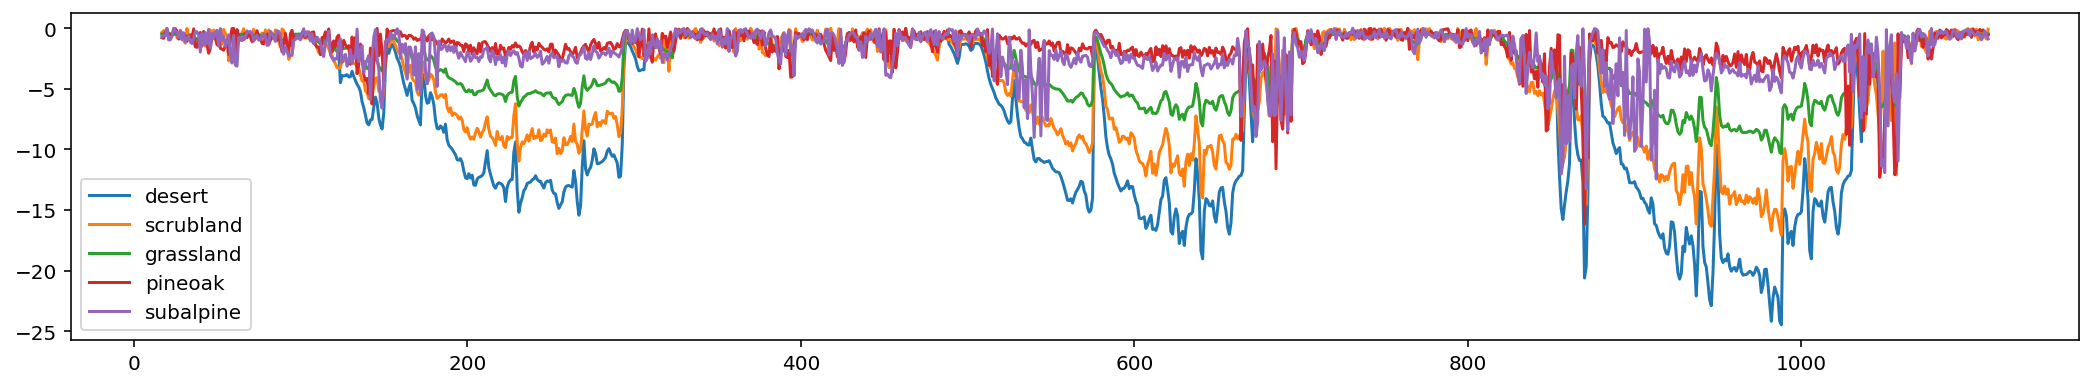

In [4]:
psi.plot(figsize=(18,3))
plt.show()

In [5]:
temp = pd.read_csv('soil_temperature/gradient_temp_v5.csv',index_col=0)
temp.head()

,desert,scrubland,grassland,pineoak,subalpine
17,9.619530,6.873709,7.235563,5.154021,3.870031
18,10.367722,7.408335,7.798333,5.554893,4.171037
19,12.130736,8.668111,9.124427,6.499493,4.880314
20,13.738533,9.816975,10.333771,7.360930,5.527147
21,16.702746,11.935075,12.563375,8.949117,6.719679


In [6]:
temp = temp.reset_index(drop=True)
temp

,desert,scrubland,grassland,pineoak,subalpine
0,9.619530,6.873709,7.235563,5.154021,3.870031
1,10.367722,7.408335,7.798333,5.554893,4.171037
2,12.130736,8.668111,9.124427,6.499493,4.880314
3,13.738533,9.816975,10.333771,7.360930,5.527147
4,16.702746,11.935075,12.563375,8.949117,6.719679
...,...,...,...,...,...
1091,11.383846,8.134414,8.562635,6.099319,4.579833
1092,13.640983,9.747269,10.260396,7.308664,5.487902
1093,11.319768,8.088627,8.514437,6.064986,4.554054
1094,9.208942,6.580321,6.926729,4.934033,3.704848


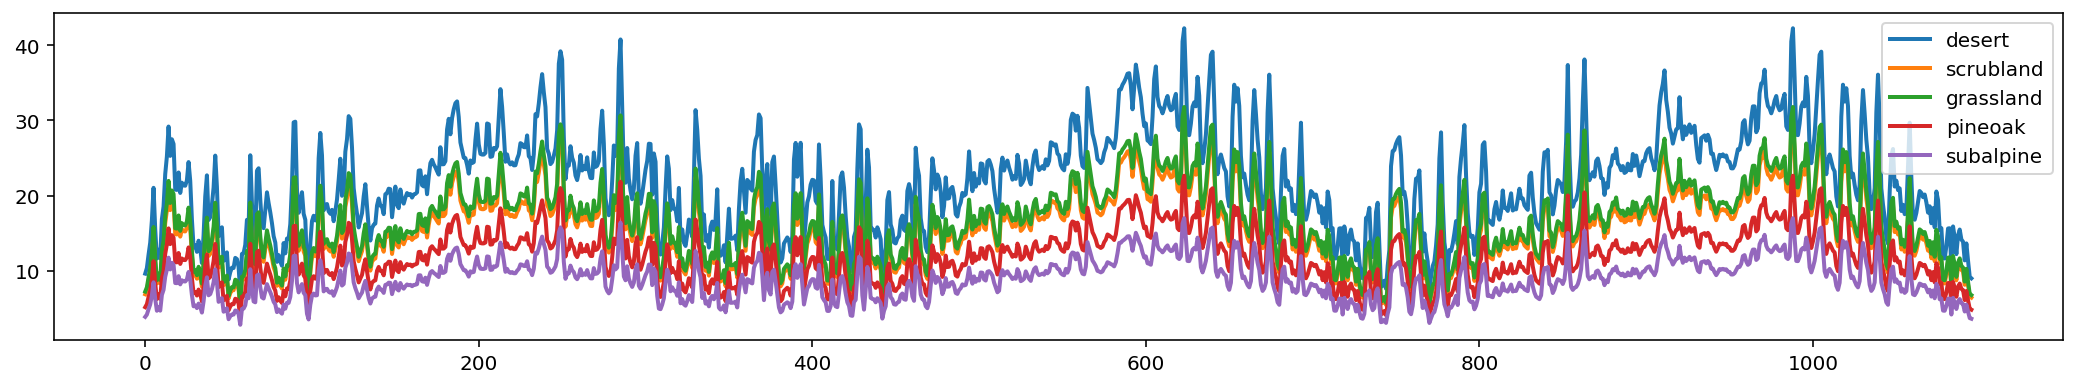

In [7]:
temp.plot(figsize=(18,3),linewidth=2)
plt.show()

In [8]:
temp.mean()

desert       22.190172
scrubland    15.856158
grassland    16.690876
pineoak      11.889210
subalpine     8.927324
dtype: float64

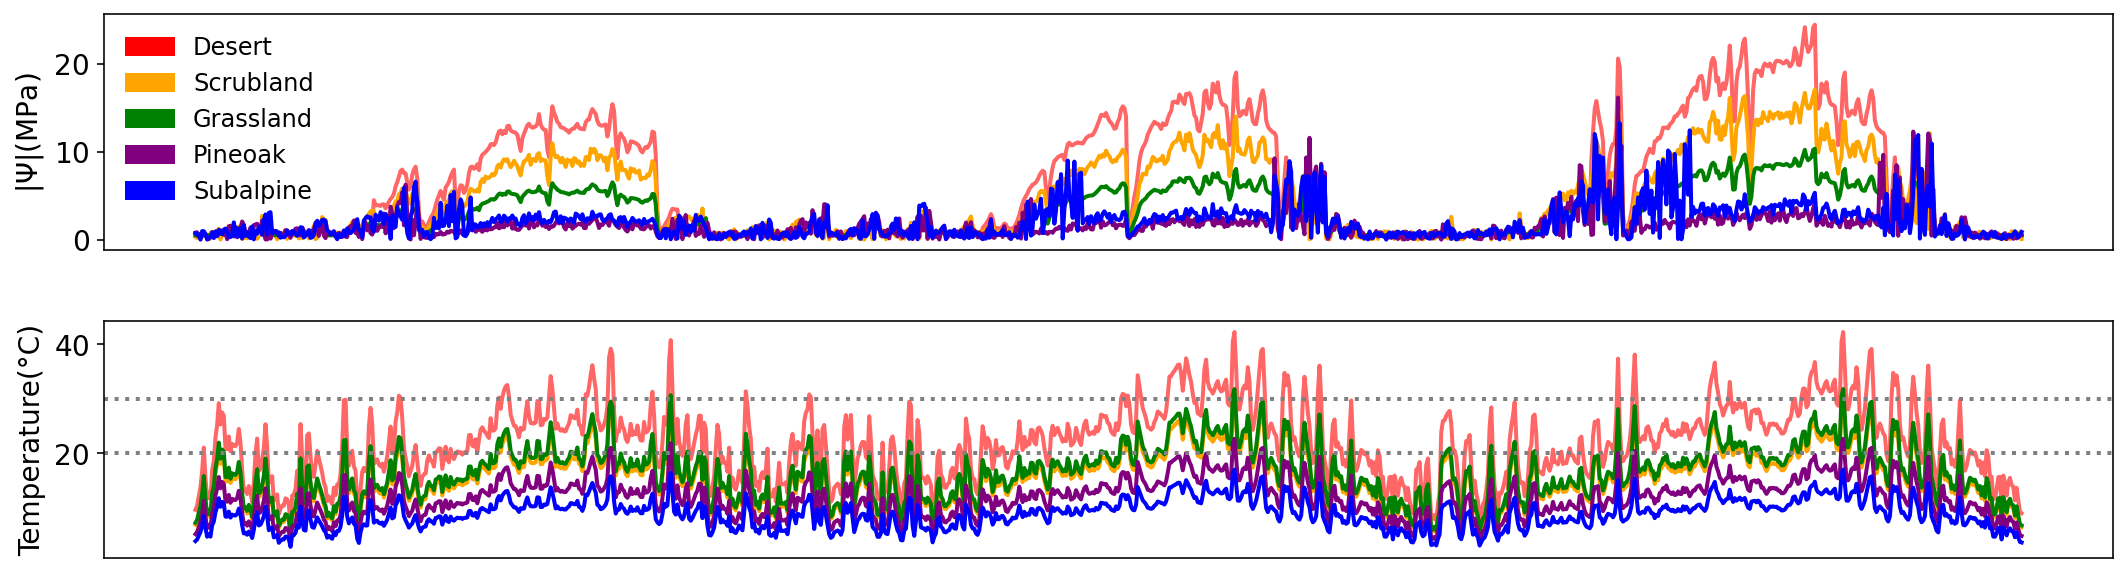

In [9]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(18,5))

#water potential
ax1.plot(abs(psi['desert']),color='red',linewidth=2,alpha=0.6)
ax1.plot(abs(psi['scrubland']),color='orange',linewidth=2)
ax1.plot(abs(psi['grassland']),color='green',linewidth=2)
ax1.plot(abs(psi['pineoak']),color='purple',linewidth=2)
ax1.plot(abs(psi['subalpine']),color='blue',linewidth=2)
ax1.set_ylabel('|$\Psi$|(MPa)',size=14)
#ax1.set_xlim(-10,365+10)
ax1.tick_params(bottom=False,labelbottom=False,labelsize=14)

#legend
red_patch    = mpatches.Patch(color='red',label='Desert')
orange_patch = mpatches.Patch(color='orange',label='Scrubland')
green_patch  = mpatches.Patch(color='green',label='Grassland')
purple_patch = mpatches.Patch(color='purple',label='Pineoak')
blue_patch   = mpatches.Patch(color='blue',label='Subalpine')
ax1.legend(handles=[red_patch,orange_patch, green_patch,purple_patch,blue_patch],fontsize=12,frameon=False)

#temperature
ax2.plot(temp['desert'],color='red',linewidth=2,alpha=0.6)    
ax2.plot(temp['scrubland'],color='orange',linewidth=2)
ax2.plot(temp['grassland'],color='green',linewidth=2)
ax2.plot(temp['pineoak'],  color='purple',linewidth=2)
ax2.plot(temp['subalpine'],color='blue',linewidth=2)
ax2.set_ylabel('Temperature(\u00B0C)',size=14)
#ax2.set_xlim(-10,365+10)
ax2.tick_params(bottom=False,labelbottom=False, labelsize=14)    
ax2.axhline(y=20.0, linewidth=2,color='grey',linestyle=":")
ax2.axhline(y=30.0, linewidth=2,color='grey',linestyle=":")

plt.subplots_adjust(hspace=0.3)

#plt.savefig('gradient_forcing.svg',bbox_inches='tight')

plt.show()

## Smooth the data

smooth the psi spike/plummet

-https://stackoverflow.com/questions/13728392/moving-average-or-running-mean

In [10]:
psi_smooth_10 = psi.rolling(10).mean()
psi_smooth_20 = psi.rolling(20).mean()
psi_smooth_30 = psi.rolling(30).mean()
psi_smooth_10

,desert,scrubland,grassland,pineoak,subalpine
17,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1108,-0.485974,-0.338639,-0.485974,-0.332856,-0.443248
1109,-0.485623,-0.394965,-0.485623,-0.307765,-0.492026
1110,-0.485621,-0.458942,-0.485621,-0.308152,-0.509640
1111,-0.485509,-0.528124,-0.485509,-0.335066,-0.502448


In [11]:
#extend the 1st point of the smoothed data back to cover the missing values b/c of moving average.
psi_smooth_10.iloc[0:9,:]  = np.tile(psi_smooth_10.iloc[9, :],(9,1))
psi_smooth_20.iloc[0:19,:] = np.tile(psi_smooth_20.iloc[19,:],(19,1))
psi_smooth_30.iloc[0:29,:] = np.tile(psi_smooth_30.iloc[29,:],(29,1))
psi_smooth_10

,desert,scrubland,grassland,pineoak,subalpine
17,-0.489084,-0.369792,-0.489084,-0.428907,-0.511758
18,-0.489084,-0.369792,-0.489084,-0.428907,-0.511758
19,-0.489084,-0.369792,-0.489084,-0.428907,-0.511758
20,-0.489084,-0.369792,-0.489084,-0.428907,-0.511758
21,-0.489084,-0.369792,-0.489084,-0.428907,-0.511758
...,...,...,...,...,...
1108,-0.485974,-0.338639,-0.485974,-0.332856,-0.443248
1109,-0.485623,-0.394965,-0.485623,-0.307765,-0.492026
1110,-0.485621,-0.458942,-0.485621,-0.308152,-0.509640
1111,-0.485509,-0.528124,-0.485509,-0.335066,-0.502448


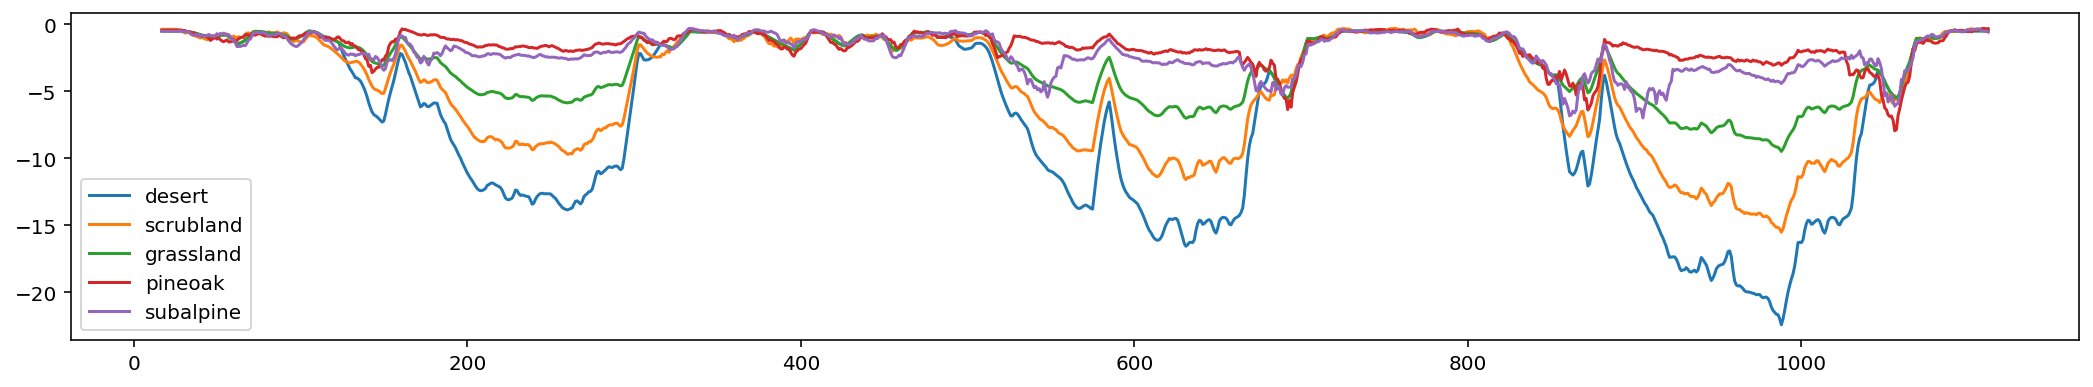

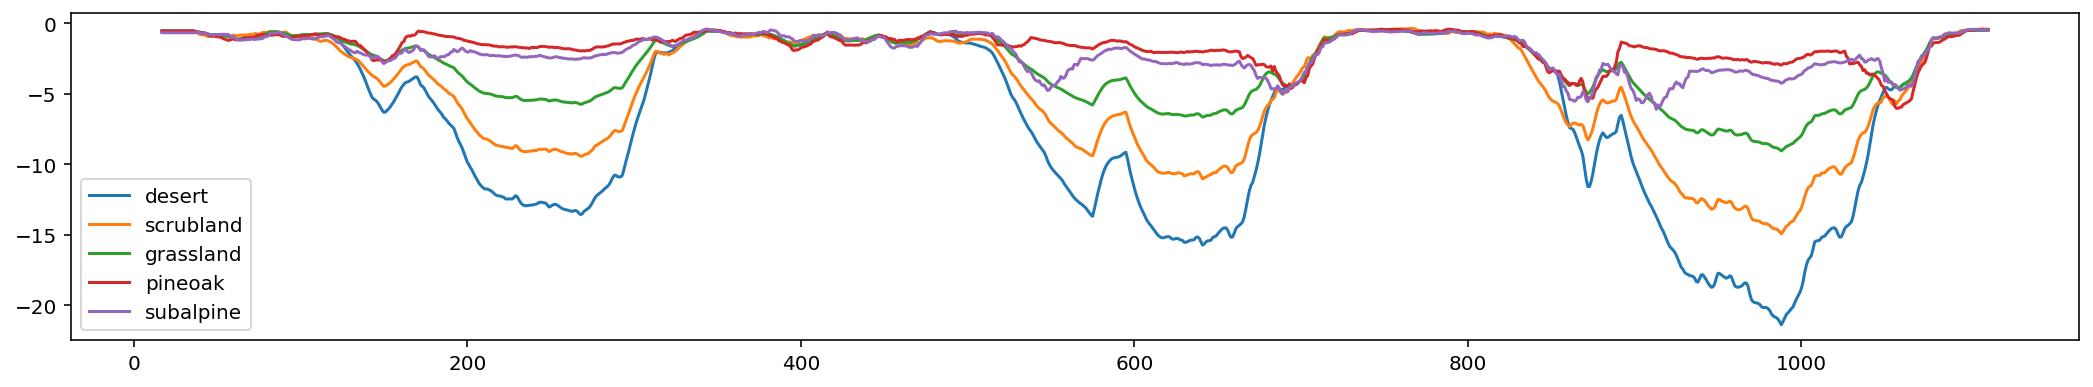

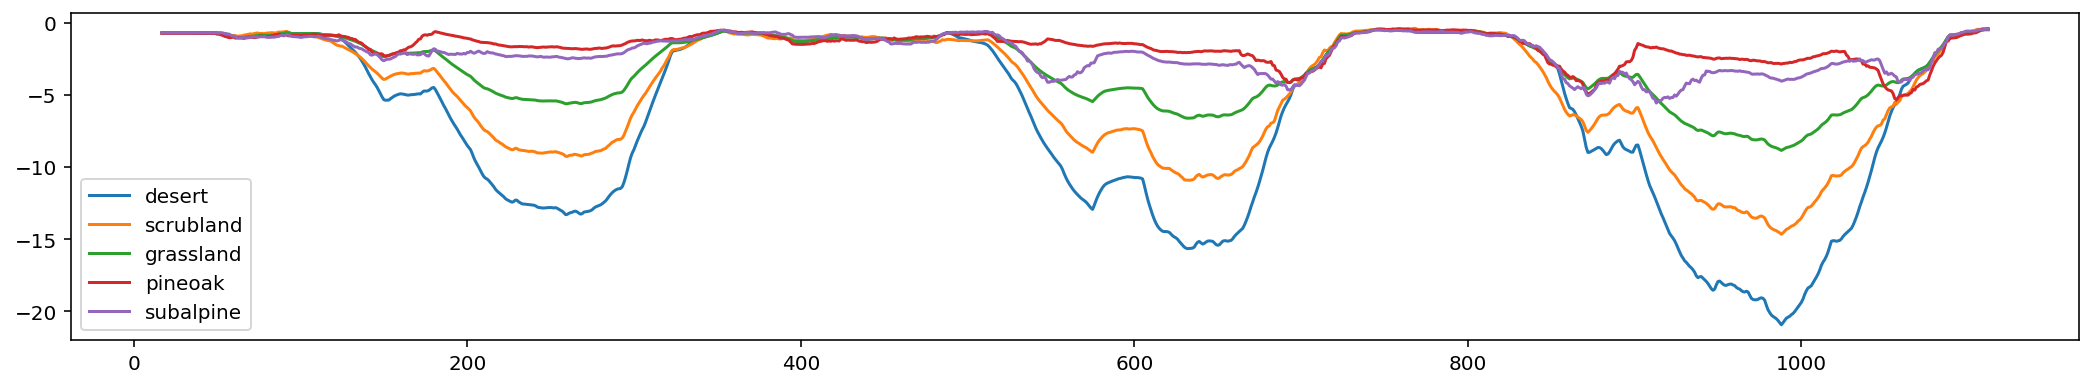

In [12]:
psi_smooth_10.plot(figsize=(18,3))
psi_smooth_20.plot(figsize=(18,3))
psi_smooth_30.plot(figsize=(18,3))
plt.show()

In [13]:
temp_smooth_10 = temp.rolling(10).mean()
temp_smooth_20 = temp.rolling(20).mean()
temp_smooth_30 = temp.rolling(30).mean()
temp_smooth_10

,desert,scrubland,grassland,pineoak,subalpine
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1091,13.818514,9.874125,10.393930,7.403783,5.559324
1092,13.617171,9.730254,10.242485,7.295906,5.478322
1093,13.710091,9.796651,10.312377,7.345691,5.515704
1094,13.040988,9.318538,9.809095,6.987194,5.246518


In [14]:
temp_smooth_10.iloc[0:9,:]  = np.tile(temp_smooth_10.iloc[9,:], (9,1))
temp_smooth_20.iloc[0:19,:] = np.tile(temp_smooth_20.iloc[19,:],(19,1))
temp_smooth_30.iloc[0:29,:] = np.tile(temp_smooth_30.iloc[29,:],(29,1))
temp_smooth_10

,desert,scrubland,grassland,pineoak,subalpine
0,13.522011,9.662257,10.170908,7.244920,5.440038
1,13.522011,9.662257,10.170908,7.244920,5.440038
2,13.522011,9.662257,10.170908,7.244920,5.440038
3,13.522011,9.662257,10.170908,7.244920,5.440038
4,13.522011,9.662257,10.170908,7.244920,5.440038
...,...,...,...,...,...
1091,13.818514,9.874125,10.393930,7.403783,5.559324
1092,13.617171,9.730254,10.242485,7.295906,5.478322
1093,13.710091,9.796651,10.312377,7.345691,5.515704
1094,13.040988,9.318538,9.809095,6.987194,5.246518


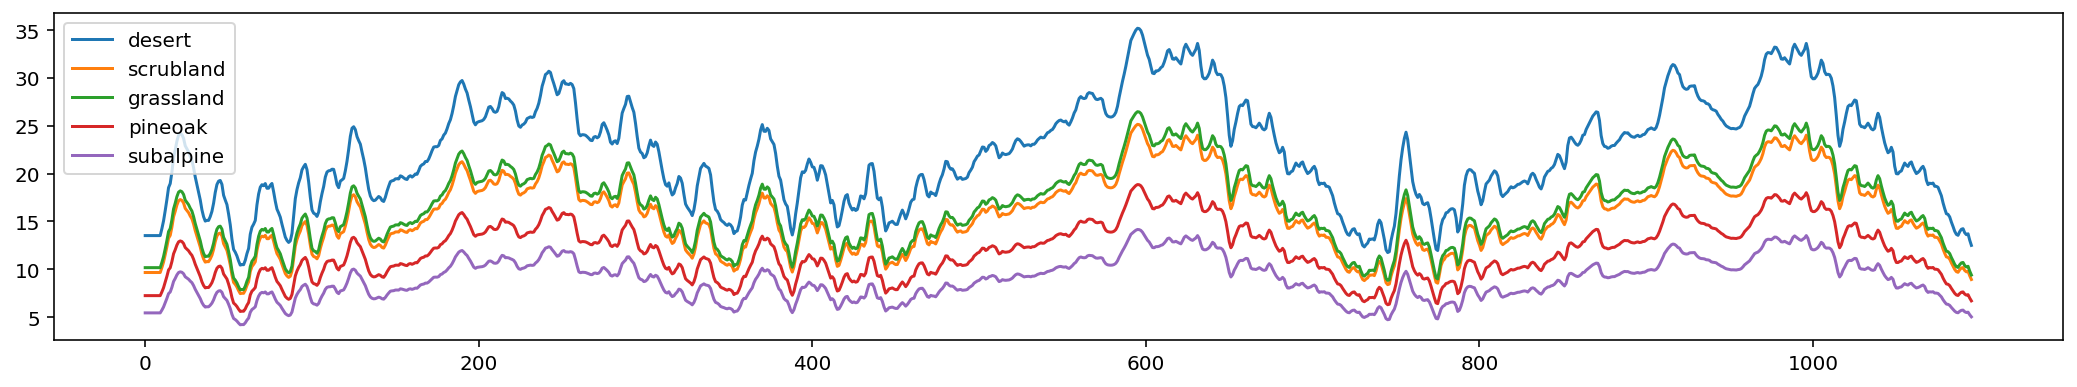

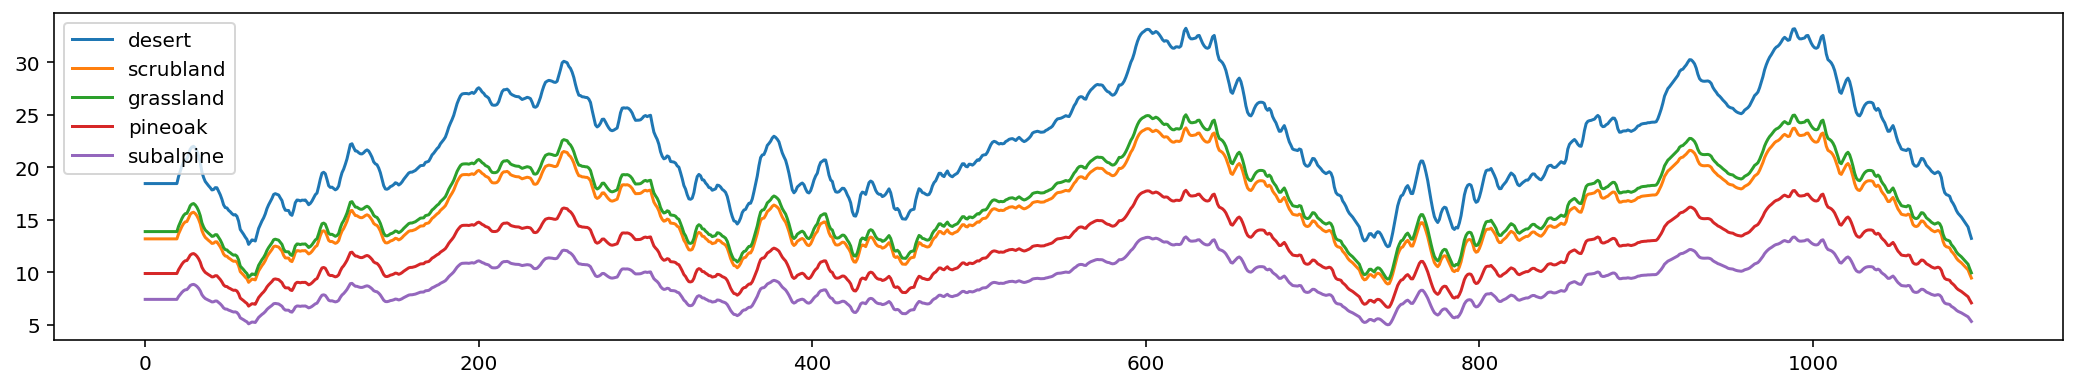

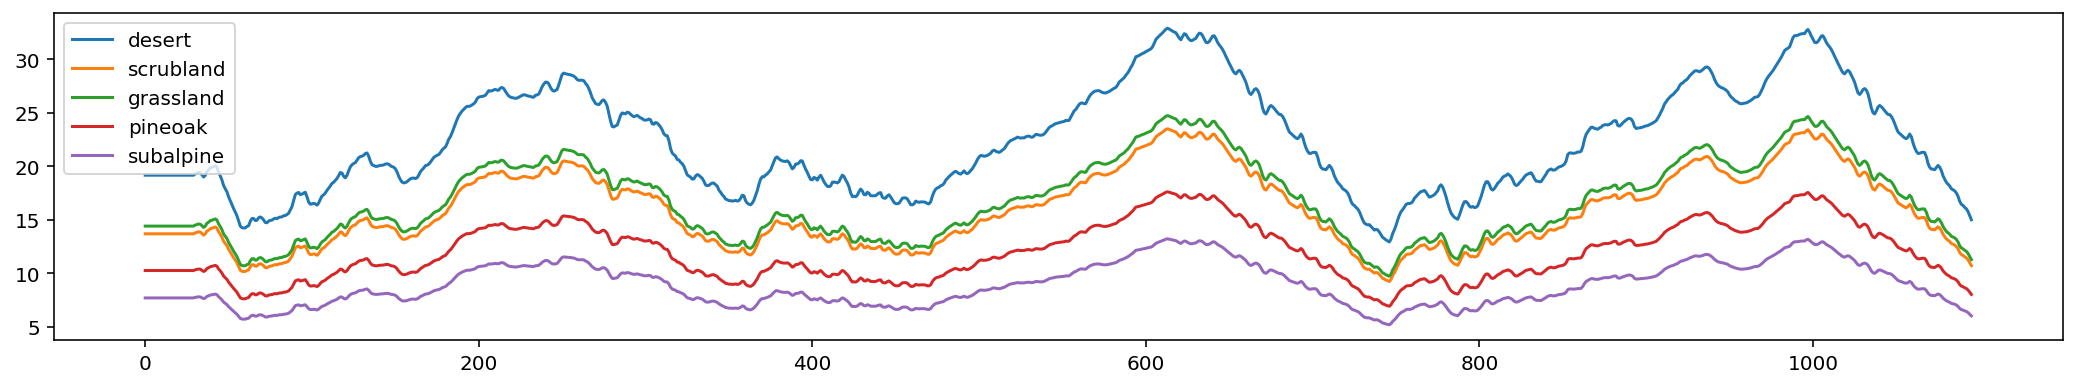

In [15]:
temp_smooth_10.plot(figsize=(18,3))
temp_smooth_20.plot(figsize=(18,3))
temp_smooth_30.plot(figsize=(18,3))
plt.show()

In [16]:
psi = psi_smooth_30
temp= temp_smooth_30

([<matplotlib.axis.XTick at 0x7fb46fa0ae50>,
 [Text(0.0, 0, 'Jan'),
  Text(33.18181818181818, 0, 'Feb'),
  Text(66.36363636363636, 0, 'Mar'),
  Text(99.54545454545453, 0, 'Apr'),
  Text(132.72727272727272, 0, 'May'),
  Text(165.9090909090909, 0, 'Jun'),
  Text(199.09090909090907, 0, 'Jul'),
  Text(232.27272727272725, 0, 'Aug'),
  Text(265.45454545454544, 0, 'Sep'),
  Text(298.6363636363636, 0, 'Oct'),
  Text(331.8181818181818, 0, 'Nov'),
  Text(365.0, 0, 'Dec')])

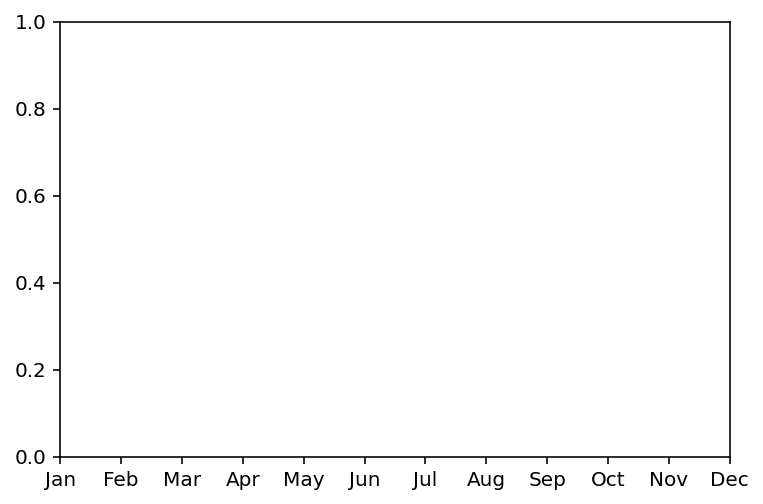

In [17]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.linspace(0,365,12), months)

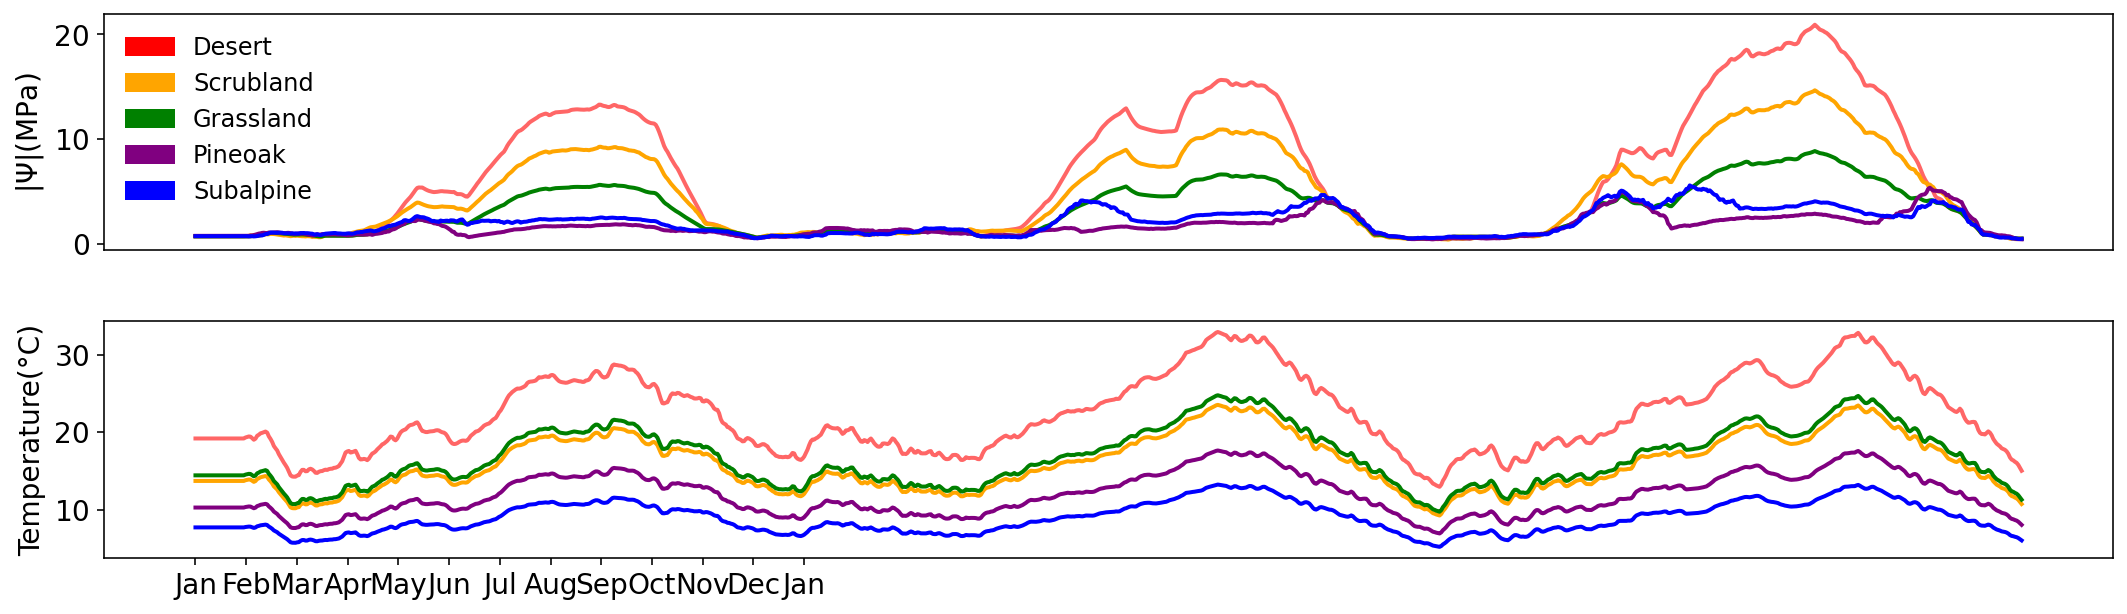

In [18]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(18,5))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan']
plt.xticks(np.linspace(0,365,13), months)


#water potential
ax1.plot(abs(psi['desert']),color='red',linewidth=2,alpha=0.6)
ax1.plot(abs(psi['scrubland']),color='orange',linewidth=2)
ax1.plot(abs(psi['grassland']),color='green',linewidth=2)
ax1.plot(abs(psi['pineoak']),color='purple',linewidth=2)
ax1.plot(abs(psi['subalpine']),color='blue',linewidth=2)
ax1.set_ylabel('|$\Psi$|(MPa)',size=14)
#ax1.set_xlim(-10,365+10)
ax1.tick_params(bottom=False,labelbottom=False,labelsize=14)

#legend
red_patch    = mpatches.Patch(color='red',label='Desert')
orange_patch = mpatches.Patch(color='orange',label='Scrubland')
green_patch  = mpatches.Patch(color='green',label='Grassland')
purple_patch = mpatches.Patch(color='purple',label='Pineoak')
blue_patch   = mpatches.Patch(color='blue',label='Subalpine')
ax1.legend(handles=[red_patch,orange_patch, green_patch,purple_patch,blue_patch],fontsize=12,frameon=False)

#temperature
ax2.plot(temp['desert'],color='red',linewidth=2,alpha=0.6)    
ax2.plot(temp['scrubland'],color='orange',linewidth=2)
ax2.plot(temp['grassland'],color='green',linewidth=2)
ax2.plot(temp['pineoak'],  color='purple',linewidth=2)
ax2.plot(temp['subalpine'],color='blue',linewidth=2)
ax2.set_ylabel('Temperature(\u00B0C)',size=14)
#ax2.set_xlim(-10,365+10)
ax2.tick_params(bottom=True,labelbottom=True, labelsize=14)    
#ax2.axhline(y=20.0, linewidth=2,color='grey',linestyle=":")
#ax2.axhline(y=30.0, linewidth=2,color='grey',linestyle=":")


plt.subplots_adjust(hspace=0.3)

#plt.savefig('figures/gradient_forcing.pdf',bbox_inches='tight')

plt.show()

### Create forcing for each site using a function "site_climate()"

In [19]:
def site_climate(site, temp, psi):
    
    site_climate = pd.concat([pd.Series(temp.tolist()), pd.Series(psi.tolist())], axis=1, ignore_index=False, sort=False)
    site_climate.columns = ['Temp', 'Psi']
    
    site_climate.to_csv("../"+site+"/climate.csv")

In [20]:
site_climate('desert',    temp['desert'],    psi['desert'])
site_climate('scrubland', temp['scrubland'], psi['scrubland'])
site_climate('grassland', temp['grassland'], psi['grassland'])
site_climate('pineoak',   temp['pineoak'],   psi['pineoak'])
site_climate('subalpine', temp['subalpine'], psi['subalpine'])